In [65]:
from qiskit import QuantumCircuit
from qiskit_aer.primitives import Estimator
import numpy as np
from itertools import product
from qiskit.quantum_info import SparsePauliOp
import random as rd
import matplotlib.pyplot as plt
import cspsa

In [66]:
from FastMeanFidelity import Mean_Direct_Fidelity

In [67]:
NQ = 4 #Number of qubits
d=2**NQ #Dimension of the Hilbert space
print("The number of qubits is given by NQ="+str(NQ)+", and the respective dimension of the Hilbert space is d="+str(d))
print("The total number of Pauli strings operators is given by d^2="+str(d**2))

The number of qubits is given by NQ=4, and the respective dimension of the Hilbert space is d=16
The total number of Pauli strings operators is given by d^2=256


In [68]:
rho0 = np.zeros(2**NQ)
rho0[0]=1

rho0[1]=-1
rho0 = rho0 / np.linalg.norm( rho0 )
rho=np.outer(rho0,rho0.conj())

In [69]:
modulo=Mean_Direct_Fidelity(NQ) 

In [70]:
Omega1 = QuantumCircuit(NQ)
Omega1.h(0)
for j in range(NQ-1):
    Omega1.cx(j, j+1)

In [71]:
from qiskit.quantum_info import Statevector
OOmega=np.array(Statevector(Omega1))
OOmegamatrix=np.outer(OOmega,OOmega.conj())

In [72]:
np.trace(rho@OOmegamatrix)

(0.2499999999999999+0j)

In [82]:
def infedelity(x):
    x=x/np.linalg.norm( x )
    return (1-modulo.MeanFidelity( 3, 
                    100, 
                    x, 
                    Omega1, 
                    shots=1000 ))**2


In [83]:
guess =rho0 # Random value to start iterating from
data = []
def normalize(x):
    return x/(np.linalg.norm( x ))
def callback0( i, x ):
    f=np.vdot(x, OOmegamatrix@x)/(np.linalg.norm( x ))**2
    data.append(f)
    return None




In [90]:
Repetitions=10
Fidelities=[[] for _ in range(Repetitions)]
optimizer = cspsa.SPSA(num_iter=400,callback=callback0,postprocessing=normalize)
for j in range(Repetitions):
    optimizer.run(infedelity, guess,progressbar=True)
    Fidelities[j]=np.array(data)
    optimizer.restart()
    data = []
    

100%|██████████| 400/400 [08:03<00:00,  1.21s/it]


d:\miniconda\envs\mati\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
d:\miniconda\envs\mati\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


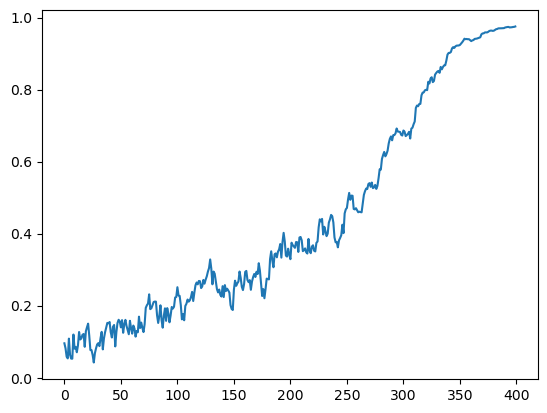

In [102]:
plt.plot(sum(Fidelities)/len(Fidelities))